<a href="https://colab.research.google.com/github/pranay2310/AirBnB-bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## Data Exploration

In [2]:
# First all import required Packages for eda
import pandas as pd
import numpy as np
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid",{'grid.linestyle': ''})
sns.set(rc={'figure.figsize':(16.7,8.27)})

## Load the Data for Analysis

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define the path where data is kept
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Project on EDA Airbnb/Airbnb NYC 2019.csv')

In [5]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Exploratory Data Analysis


In [8]:
# Before starting of data Analysis, we should know the basic infomartion of Airbnb Dataset such number of rows & columns, datatype we have 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

For proper visualisation of Nan value . we will use Heatmap

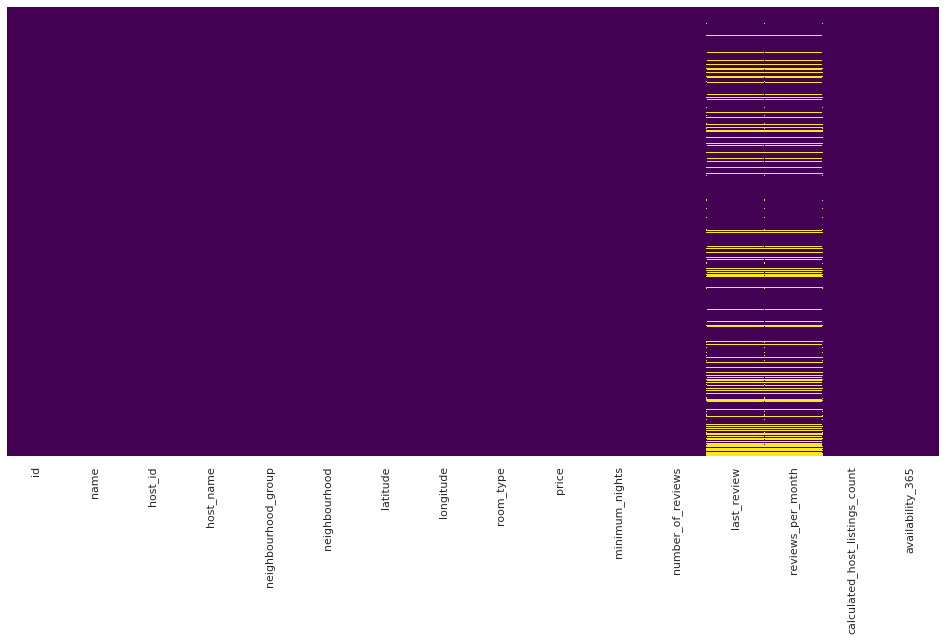

In [10]:
sns.heatmap(df.isnull(),yticklabels= False,cbar = False , cmap='viridis')

After observation of airbnb dataset . we obeserve certain points as follows:
1. There are 48895 rows and 16 columns.
2. Most number of NaN value present in last_review and 'review per_month' column
3. Dataset divide into numerical and catogorical datatype

Missing values present in these two columns  'last_review' and 'review per_month'. So we must be need to do data cleaning and handle missing value before data exploration. 



## Univariant Analysis

In [11]:
airbnb_df_with_na = df.copy()

### column 1. name

this column contain the name (descreption) of the property which the host is giving on rent by which he can draw the customer's attention.

In [12]:
df.name.nunique()

47905

In [13]:
df.host_name.nunique()

11452

In [14]:
df.host_id.nunique()

37457

###column 4. neighbourhood

In [15]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

we can see neighbourhood group has 6 neighbour area. so we will find out which area neighbour area has most number of rooms.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


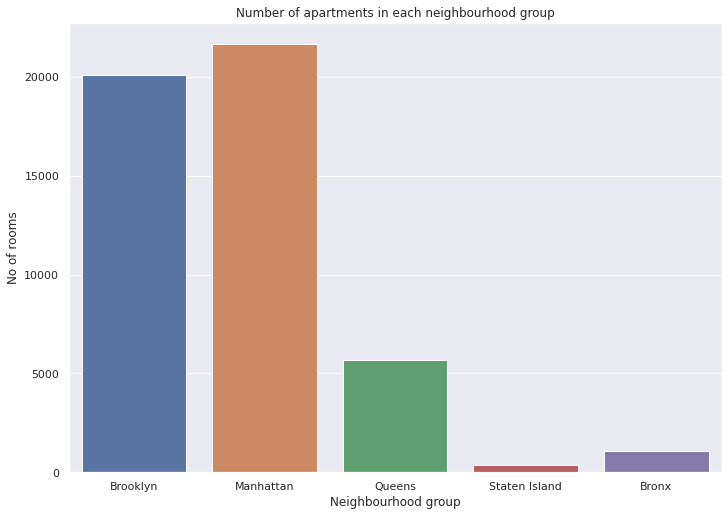

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(df.neighbourhood_group).set_title("Number of apartments in each neighbourhood group")
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood group')
plt.show()

## Observation
### by the above graph we can observe manhatten has most of the rooms followed by brooklyn and queens

## column no 5. neighbourhood

In [17]:
# find the how many unique value in neighbourhoor column
df.neighbourhood.nunique()

221

there are 221 neighbourhood in these 5 neighbourhood_groups. Therefore we need to find which maximum booking neighbourhood group for their respective nieghbourhood group.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


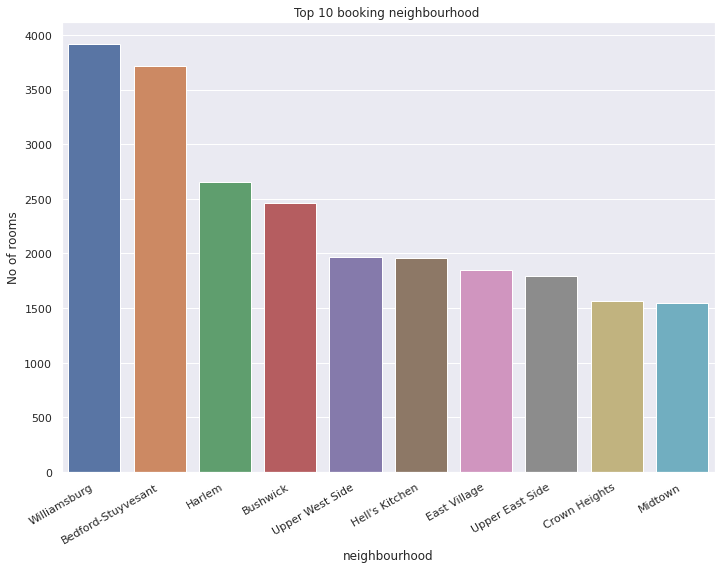

<Figure size 1152x1080 with 0 Axes>

In [18]:
sns.countplot( df.neighbourhood, order =df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 booking neighbourhood ') 
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of rooms')
plt.figure(figsize=(16,15)) 
plt.show()

In [19]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [20]:
# now we have to store similar neighbourhood in their respective neighbour group in different dataframes
brooklyn_group_df=df.loc[df['neighbourhood_group']== 'Brooklyn']
manhattan_group_df=df.loc[df['neighbourhood_group']== 'Manhattan']
Queens_group_df=df.loc[df['neighbourhood_group']== 'Queens']
Staten_Island_group_df=df.loc[df['neighbourhood_group']== 'Staten Island']
Bronx_group_df=df.loc[df['neighbourhood_group']== 'Bronx']

In [21]:
brooklyn_group_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48882,36482231,Bushwick _ Myrtle-Wyckoff,66058896,Luisa,Brooklyn,Bushwick,40.69652,-73.91079,Private room,40,20,0,NaN,NaN,1,31
48884,36482783,Brooklyn Oasis in the heart of Williamsburg,274307600,Jonathan,Brooklyn,Williamsburg,40.71790,-73.96238,Private room,190,7,0,NaN,NaN,1,341
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9


Text(0.5, 0, 'Neighbourhood')

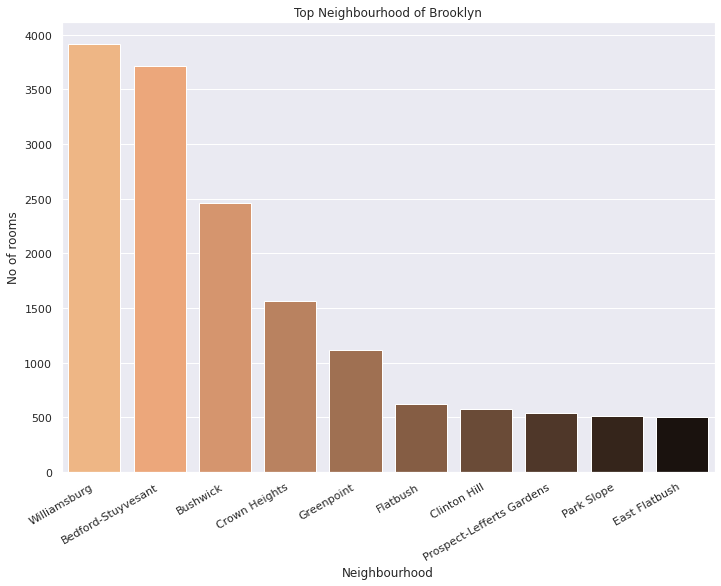

In [22]:
sns.countplot(x="neighbourhood", data=brooklyn_group_df, palette="copper_r",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Brooklyn")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

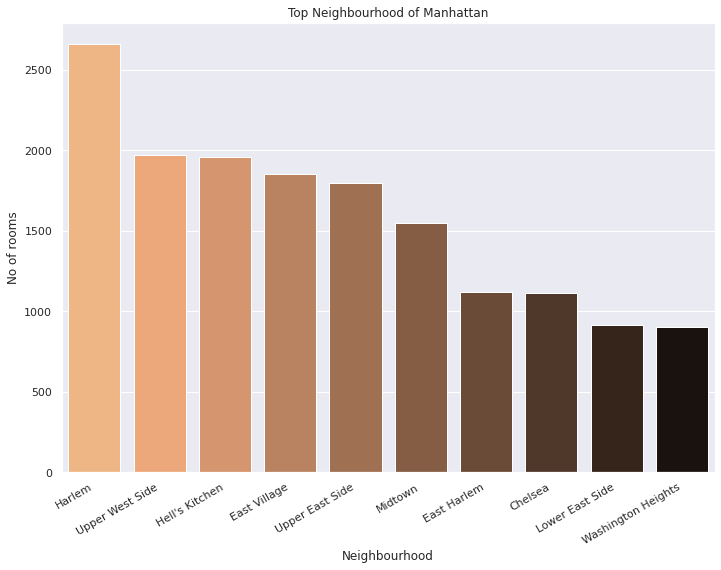

In [23]:
sns.countplot(x="neighbourhood", data=manhattan_group_df, palette="copper_r",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Manhattan")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

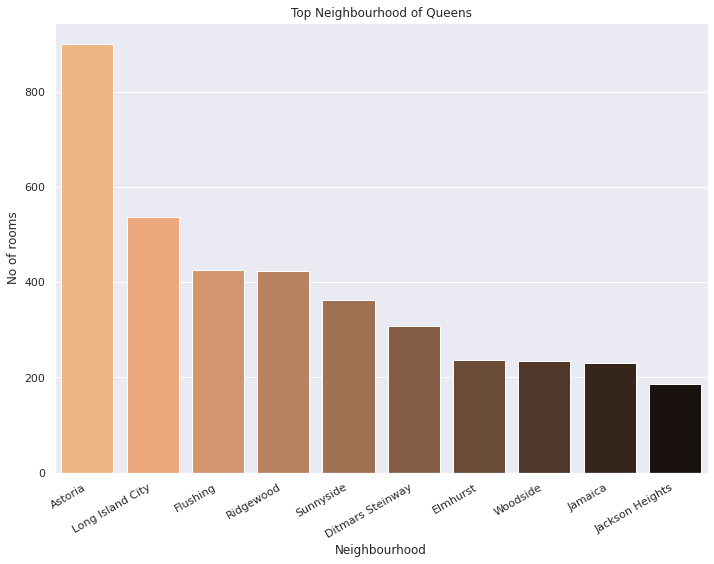

In [24]:
sns.countplot(x="neighbourhood", data=Queens_group_df, palette="copper_r",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Queens")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

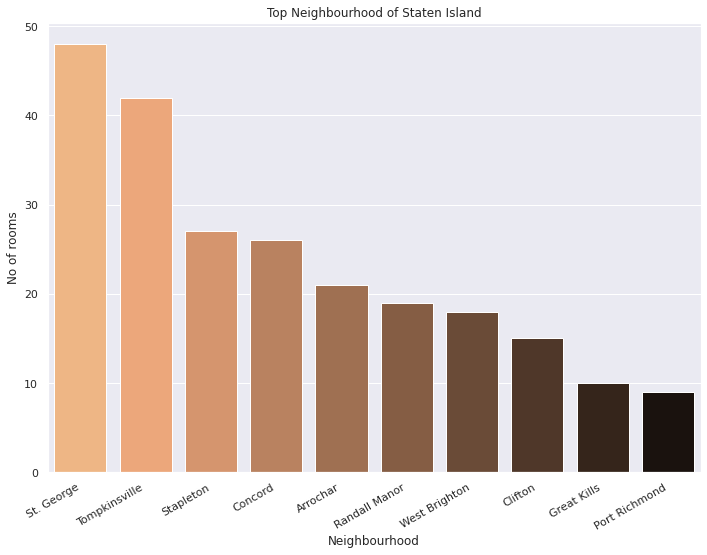

In [25]:
sns.countplot(x="neighbourhood", data=Staten_Island_group_df, palette="copper_r",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Staten Island")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

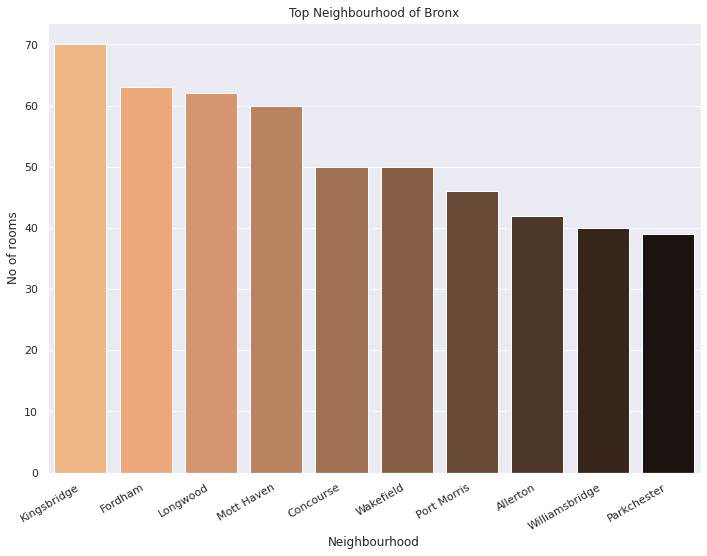

In [26]:
sns.countplot(x="neighbourhood", data=Bronx_group_df, palette="copper_r",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Bronx")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood')

In [27]:
df.neighbourhood.value_counts().iloc[:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [28]:
df.neighbourhood.value_counts().iloc[:10].index

Index(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
       'Upper West Side', 'Hell's Kitchen', 'East Village', 'Upper East Side',
       'Crown Heights', 'Midtown'],
      dtype='object')

Text(0.5, 1.0, 'Top 10 Bronx neighbourhood value count')

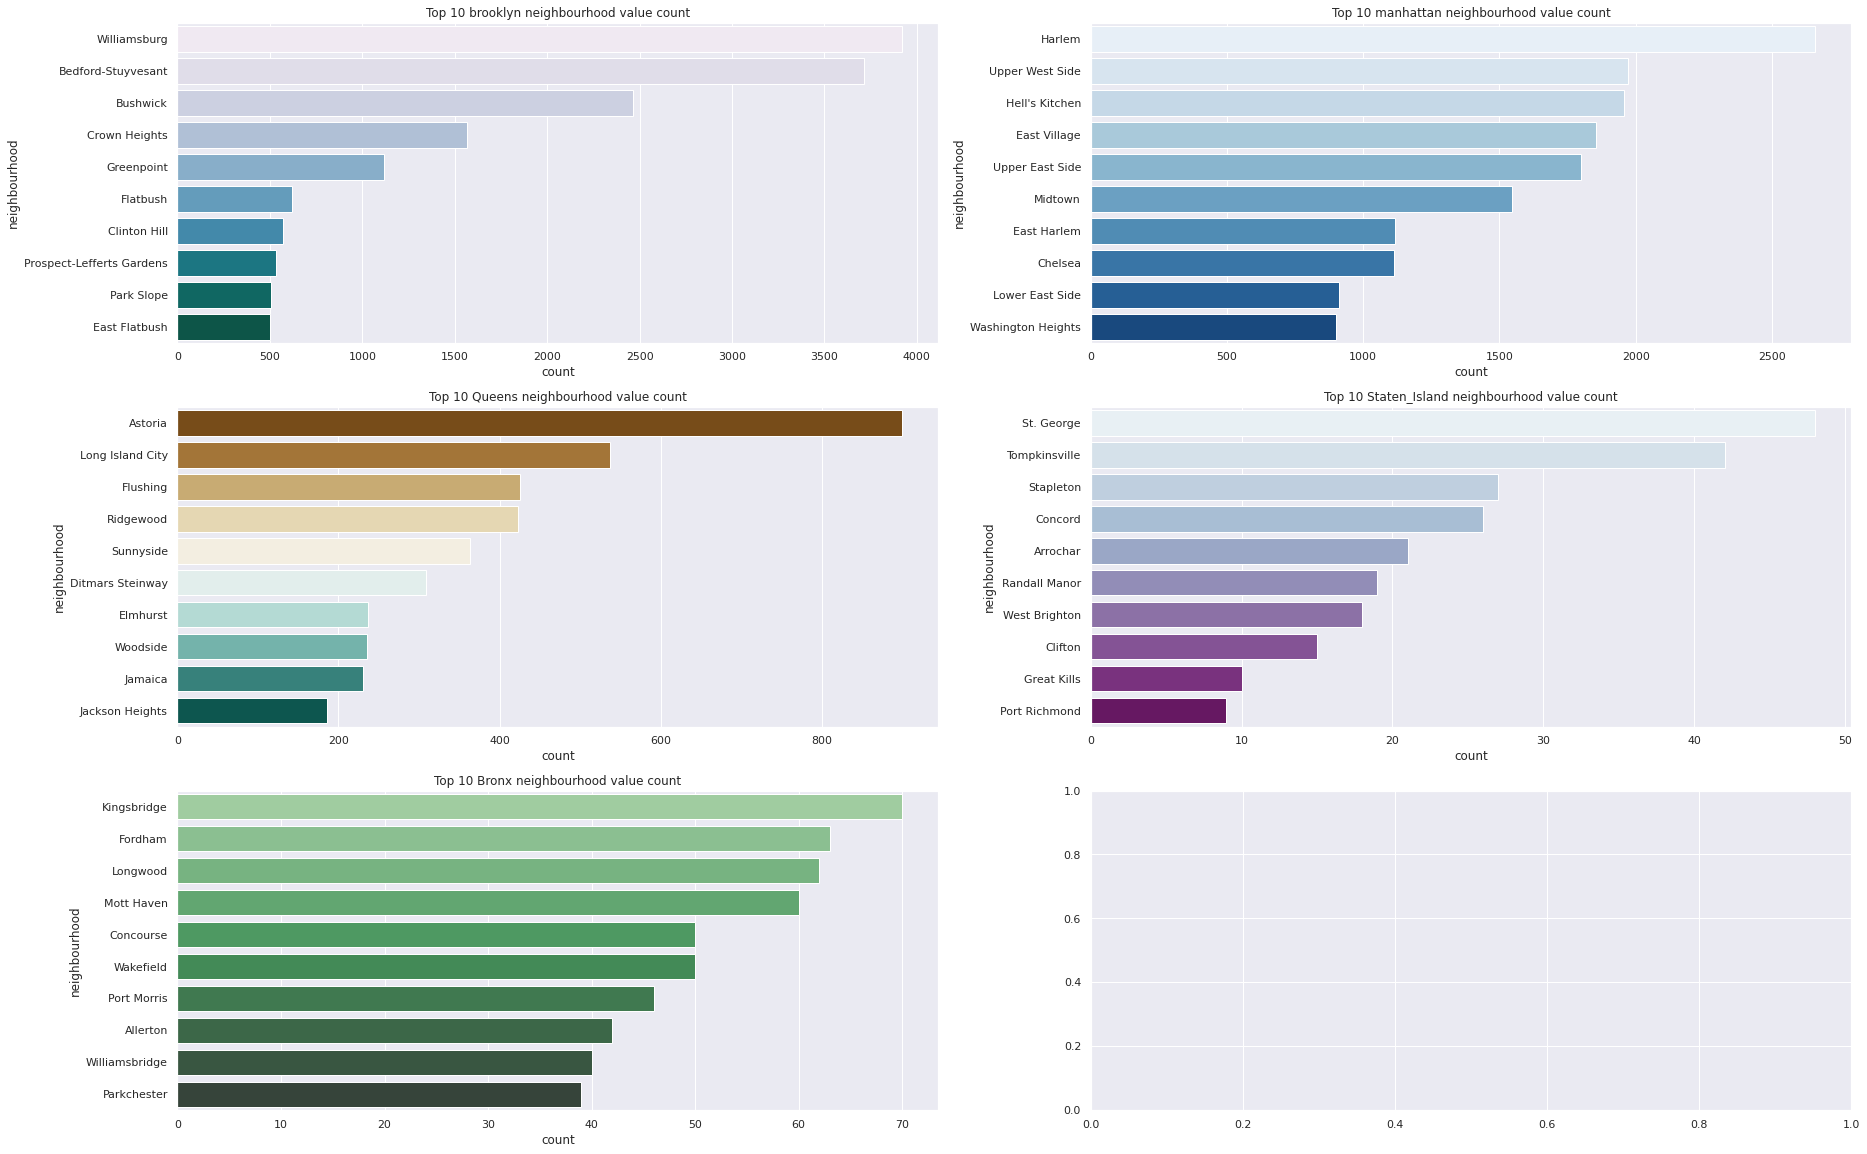

In [29]:
# creating subplots to plot all the graphs together 
fig, axes = plt.subplots(3,2, figsize=(30, 20))
sns.countplot(ax=axes[0,0],y="neighbourhood", data=brooklyn_group_df, palette="PuBuGn",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 brooklyn neighbourhood value count')
              
              
sns.countplot(ax=axes[0,1],y="neighbourhood", data=manhattan_group_df, palette="Blues",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 manhattan neighbourhood value count')

sns.countplot(ax=axes[1,0],y="neighbourhood", data=Queens_group_df, palette="BrBG",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 Queens neighbourhood value count')

sns.countplot(ax=axes[1,1],y="neighbourhood", data=Staten_Island_group_df, palette="BuPu",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 Staten_Island neighbourhood value count')

sns.countplot(ax=axes[2,0],y="neighbourhood", data=Bronx_group_df, palette="Greens_d",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 Bronx neighbourhood value count')

##Observations from the above graphs are as follow:
1. Willamsburg, Bedford and Bushwick have most no of bookings in brooklyn neighbourhood_group
2. Harlem, Upper West Side and Hell's Kitchen have most no of bookings in manhattan neighbourhood_group
3. Astoria, Flushing and Long island city  have most no of bookings in Queens neighbourhood_group
4. Tompkinsville, St.George, Cancaord have most no of bookings in Staten_Island neighbourhood_group
5. Kingsbridge,Fordham,Longwood have most no of bookings in Bronx Neighbour_group

## Column 6 and 7 : Latitude and longitude

In [30]:
df.latitude.describe()

count    48895.000000
mean        40.728949
std          0.054530
min         40.499790
25%         40.690100
50%         40.723070
75%         40.763115
max         40.913060
Name: latitude, dtype: float64

In [31]:
df.longitude.describe()

count    48895.000000
mean       -73.952170
std          0.046157
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936275
max        -73.712990
Name: longitude, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


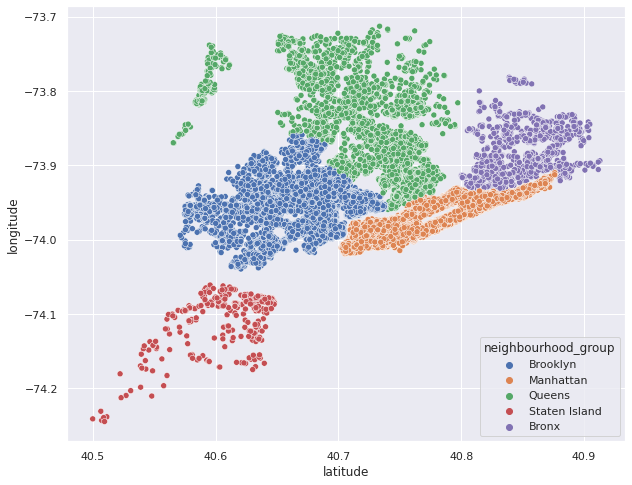

In [32]:
# Pointing the plot on graph through scattering plot
plt.figure(figsize=(10,8))
sns.scatterplot(df.latitude,df.longitude, hue='neighbourhood_group', data=df)


Text(0.5, 1.0, 'Density of rooms')

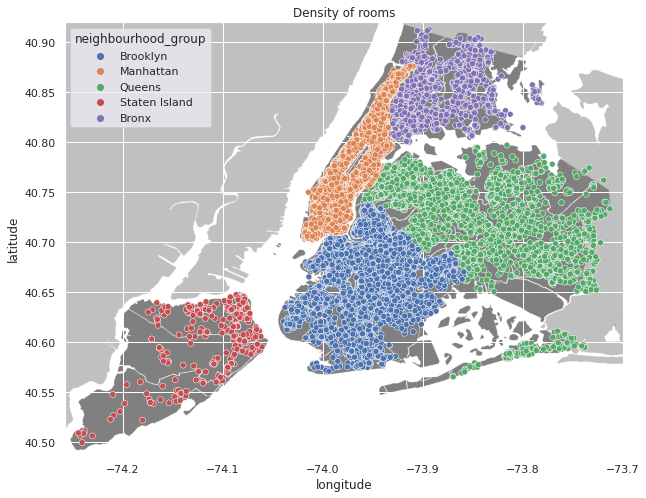

In [33]:
# Importing image 
import urllib
# setting  figure size
plt.figure(figsize=(10,8))
# setting  background map image in graph
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
image=plt.imread(img)
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
sns.scatterplot(data = df,x='longitude',y='latitude',hue='neighbourhood_group').set_title('Density of rooms')

### Column no. 8: Room type

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


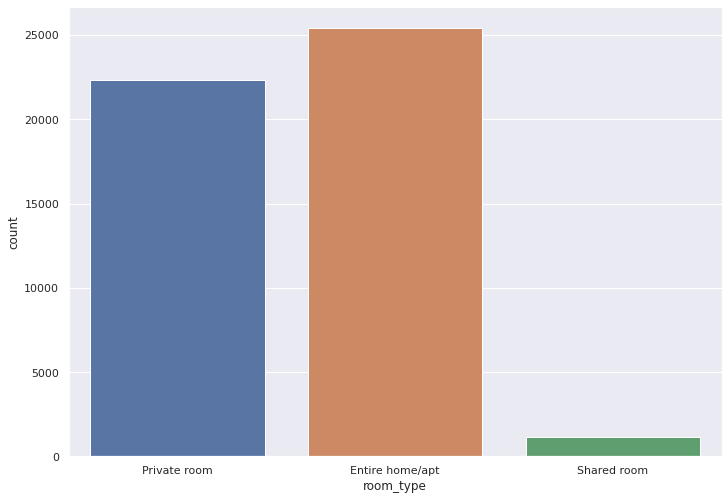

In [34]:
#number of rooms_type provided by the hosts
print(df.room_type.value_counts())
sns.countplot(df.room_type)

##Observation :
##There are 3 room type provided by the host. Most of the rooms provided are private rooms and Entire home or apartments type.

##Share rooms are very few, therefore we observe that people who aRE travelling will prefer the top 2 room types rather than sharing.

### column 9 : price of room

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


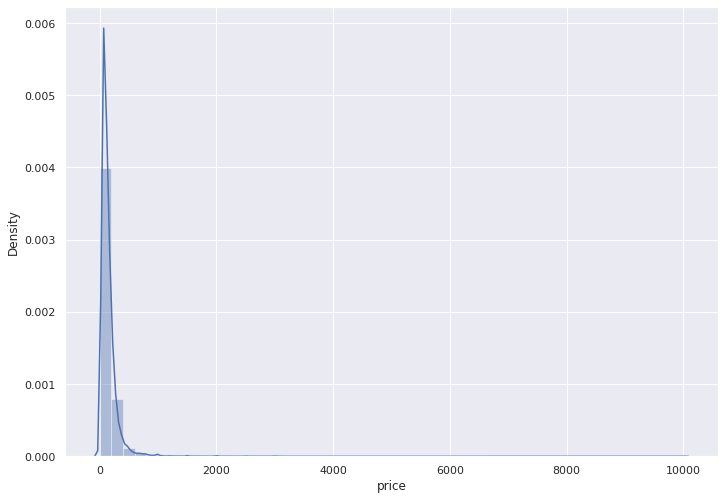

In [35]:
sns.distplot(df.price)

### Observation :
1. Maximun price of property are range between 0 to 1000.
2. There is Property which has price zero it is impossible.

In [36]:
# lets see how many property have price zero
zero_price_property = df.loc[df.price == 0 ]
zero_price_property

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [37]:
zero_price_property.shape

(11, 16)

### we can see that there are 11 property which has zero price. This is unusual.

## Column no. 10 : Minimum Nights

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of rooms')

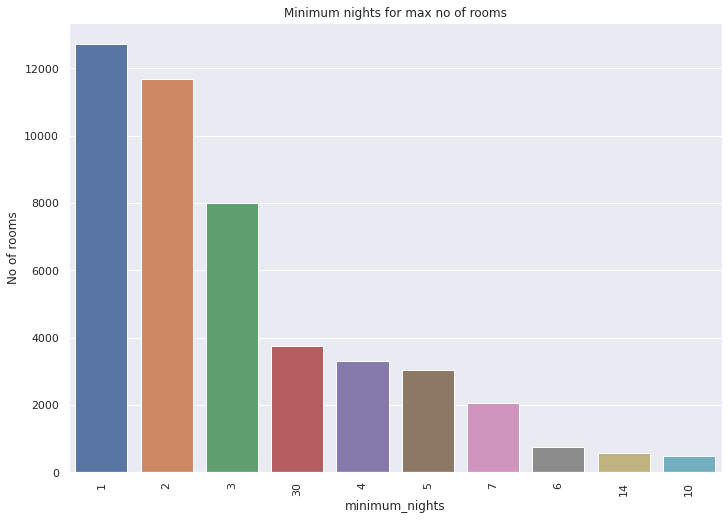

In [38]:
#creating a count plot 
sns.countplot(df.minimum_nights,order=df.minimum_nights.value_counts().iloc[:10].index).set_title('Minimum nights for max no of rooms')
#rotating x lables 
plt.xticks(rotation=90)
#adding x and y labels to the plot
plt.ylabel('No of rooms')

In [39]:
#properties recieving highest reviews.
highest_reviews = df.sort_values(by='number_of_reviews', ascending=False)
highest_reviews.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173


## Observation:
above dataframe shows to 10 review

In [40]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Column number 11: Number of review

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


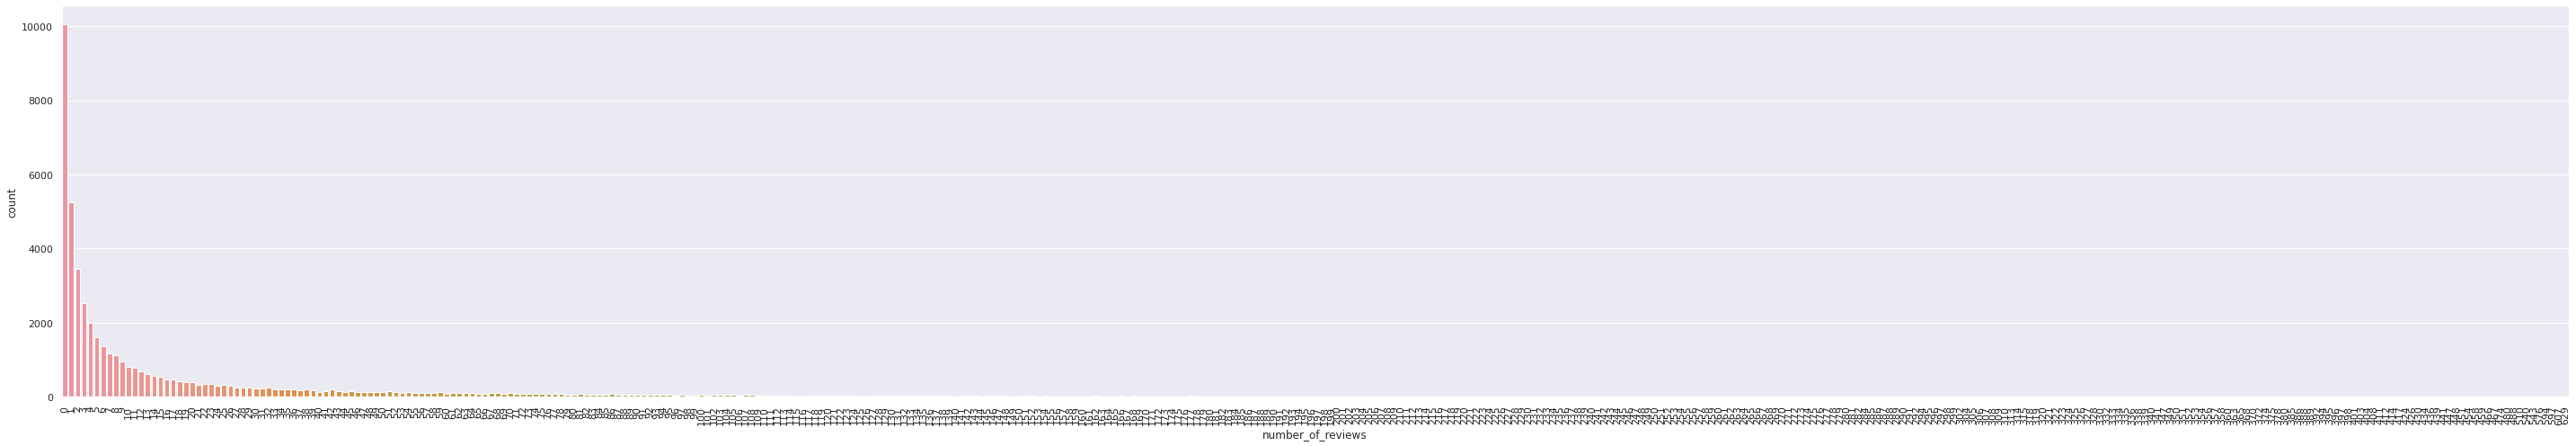

In [41]:
#settingt he size of the figure 
plt.figure(figsize=(50,8))
#creating a caunt plot
sns.countplot(df.number_of_reviews)
#rotating the x lables
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


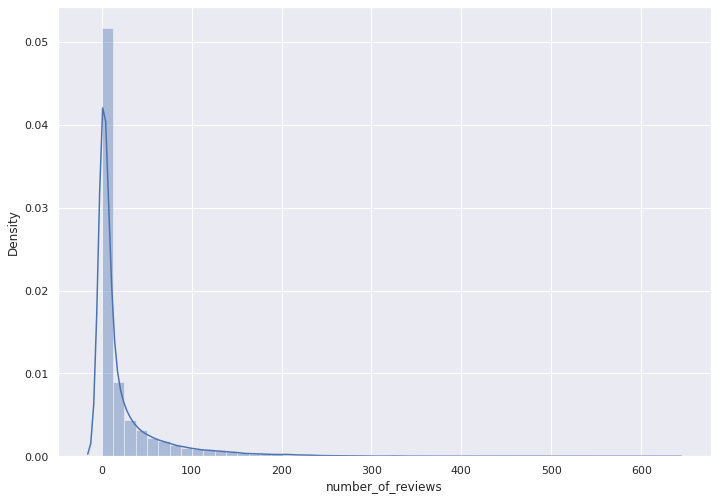

In [42]:
#creating a dist plot
sns.distplot(df.number_of_reviews)

# Column number 12 : Last Review

In [43]:
df['last_review']=pd.to_datetime(df['last_review'])
df.last_review

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

In [44]:
#printing the least and most recent review date
least_recent_date = df['last_review'].min()
most_recent_date = df['last_review'].max()
print(f'the least recent date is {least_recent_date.date()} and the most recent date is {most_recent_date.date()} in last review')

the least recent date is 2011-03-28 and the most recent date is 2019-07-08 in last review


# Colunm number 13:  reviews per month

In [45]:
df.reviews_per_month.describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

Text(0, 0.5, 'No of rooms')

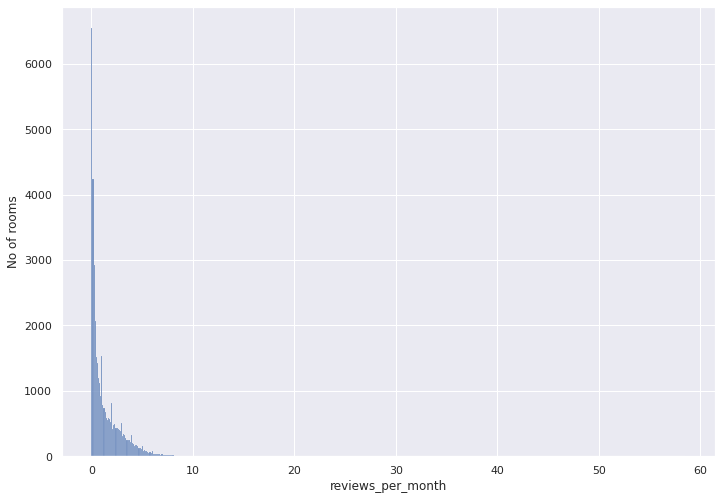

In [46]:
#creating histplot and adding lablesto y axis
sns.histplot(df[df['reviews_per_month']>0].reviews_per_month)
plt.ylabel('No of rooms')

# Data cleaning and wrangling

In [47]:
# calling features
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [48]:
df.info

<bound method DataFrame.info of              id  ... availability_365
0          2539  ...              365
1          2595  ...              355
2          3647  ...              365
3          3831  ...              194
4          5022  ...                0
...         ...  ...              ...
48890  36484665  ...                9
48891  36485057  ...               36
48892  36485431  ...               27
48893  36485609  ...                2
48894  36487245  ...               23

[48895 rows x 16 columns]>

In [49]:
print(df.isnull().any())

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool


In [50]:
# We have 4 columns contain a missing value. Now, we drop unnecessary columns such as id, name, host_name, last_review.

In [51]:
df.drop(['id','name','host_name','last_review'], axis=1, inplace=True)
print(df.head())

   host_id  ... availability_365
0     2787  ...              365
1     2845  ...              355
2     4632  ...              365
3     4869  ...              194
4     7192  ...                0

[5 rows x 12 columns]


In [52]:
# Replacing all NaN values in “review_per_month_ with 0
df.reviews_per_month.fillna(0, inplace=True)
print(df.isnull().any())

host_id                           False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool


we haven't have any missing value

##Data visulaization

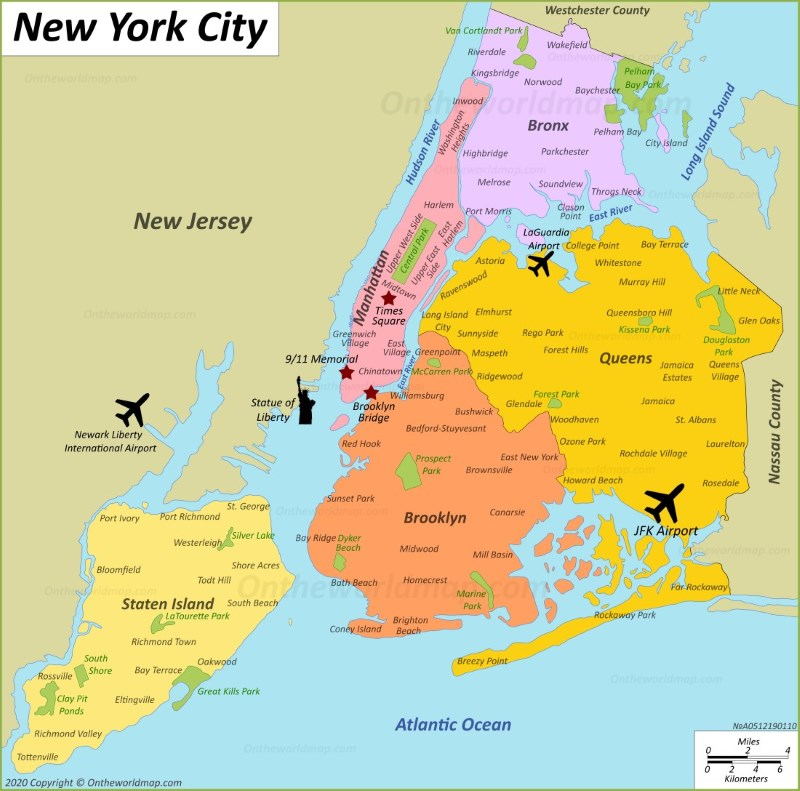

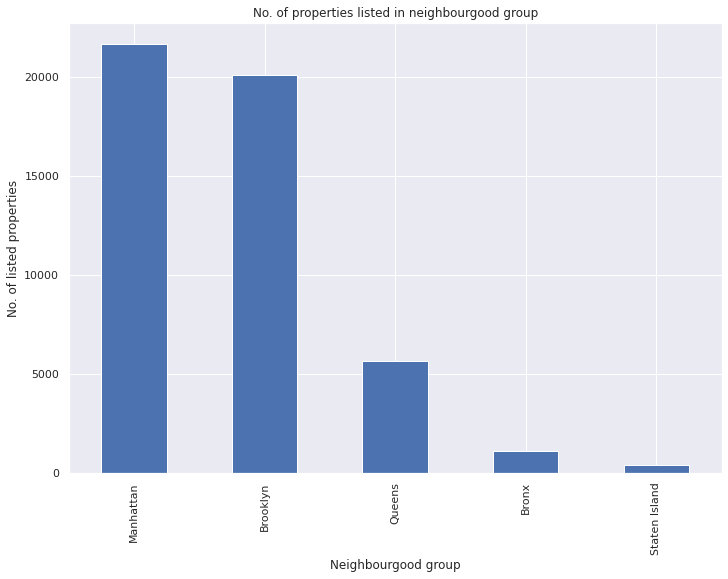

In [53]:
#number of listing at neughbourhood group
df['neighbourhood_group'].value_counts().plot(kind='bar')
plt.title('No. of properties listed in neighbourgood group')
plt.xlabel('Neighbourgood group')
plt.ylabel('No. of listed properties')
plt.show()

In [54]:
df.groupby('neighbourhood_group')['price'].max().reset_index()

,neighbourhood_group,price
0,Bronx,2500
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000


###Top planning area

Text(0.5, 1.0, 'Top 15 areas that have highest number of listing')

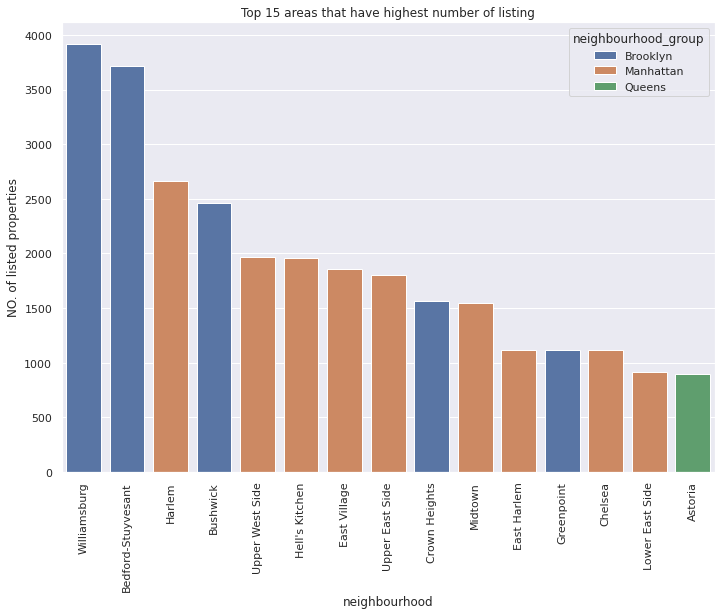

In [55]:
#top planning areas
top_planing_area=df.groupby(['neighbourhood_group']).neighbourhood.value_counts(ascending=True).sort_values(ascending=False).head(15).to_frame('NO. of listed properties').reset_index()
a=sns.barplot(x='neighbourhood',y='NO. of listed properties',hue='neighbourhood_group',data=top_planing_area,dodge = False)
plt.xticks(rotation=90)
a.set_title('Top 15 areas that have highest number of listing')

#1. if we have higher min nights does that mean price per night will be less	 ( need more analysis) and is there any relation between any columns <br>

Minimum night and price per night is not corealted.

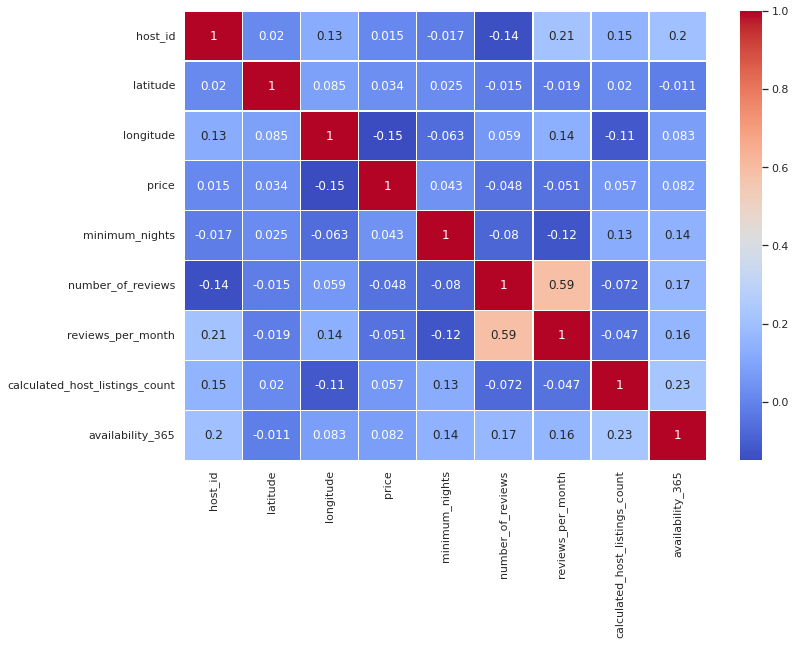

In [56]:
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm',linewidths=.5)

In [57]:
# if we have higher min nights does that mean price per night will be less     
df.groupby(['room_type','minimum_nights'])

In [58]:
minimum_night_price = df.groupby(['room_type','minimum_nights'],
                                 as_index=False)['price'].median()
minimum_night_price.loc[~(minimum_night_price['minimum_nights'] == 999)] 
minimum_night_price.loc[~((minimum_night_price['price'] >= 500) )] 

,room_type,minimum_nights,price
0,Entire home/apt,1,158.0
1,Entire home/apt,2,165.0
2,Entire home/apt,3,168.0
3,Entire home/apt,4,165.0
4,Entire home/apt,5,155.0
...,...,...,...
187,Shared room,62,35.0
188,Shared room,90,25.0
189,Shared room,100,33.0
190,Shared room,120,35.0


##does no of review affect the price ?

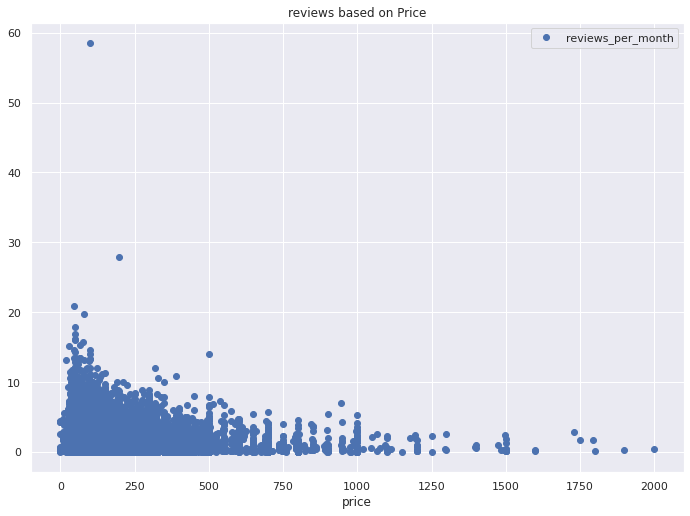

In [59]:
price_review = df[['reviews_per_month', 'price']].sort_values(by = 'price')
price_review=price_review.loc[price_review['reviews_per_month']>0]
price_review=price_review.loc[price_review['price']<2000]
price_review.plot(x = 'price', y = 'reviews_per_month', 
                  style = 'o',
                  title = 'reviews based on Price')

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x7f90885c6650>>

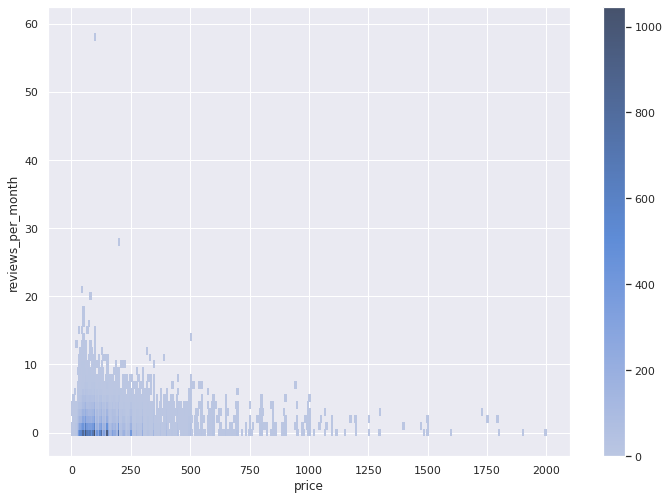

In [60]:
sns.histplot(data = price_review, x = 'price', y = 'reviews_per_month',discrete=(False,True),cbar=True).set

Observations

1) review per month of price range between 0 & 250 is more by which we can conclude that most people prefer renting rooms which have a price below 250 

2) reviews per month decrease as you increase the price

Which neighbourhood is most expensive in NewYork City? (at each neighbourhood-group)
1. At manhattan, Tribecca and flatiron district.
2. At brooklyn, Dumbo
3. At Bronx, Riverdale
4. At queens, ponsit
5. At Staten Island, Fort wastword

## 2. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

Text(0.5, 1.0, 'Density of rooms')

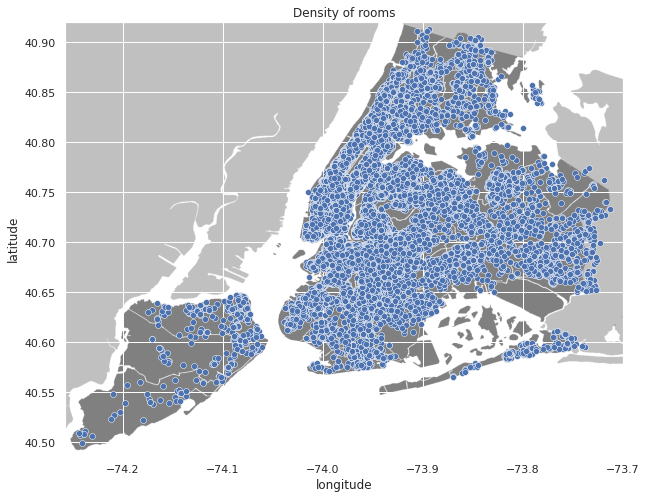

In [61]:
# Importing image 
import urllib
# setting  figure size
plt.figure(figsize=(10,8))
# setting  background map image in graph
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
image=plt.imread(img)
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
sns.scatterplot(data = df,x='longitude',y='latitude').set_title('Density of rooms')

In [62]:

import folium
from folium.plugins import HeatMap
from folium import plugins
station = df[['latitude','longitude']]
stationArr = station.values
map_NYC = folium.Map([40.80902,-73.94190],zoom_start=7)
map_NYC.add_child(plugins.HeatMap(stationArr, radius=15))
map_NYC



## 2. availability 365 is proportional to review per month

In [63]:
#av_365_rew = df.loc[~((df['reviews_per_month'] == 0))].reset_index()
#av_df.loc[~(df==0).all(axis=1)]
#av_365rew.head(3)
av_365_rew = df.loc[~((df['reviews_per_month'] == 0))].reset_index()
av_365_rew.head(3)

,index,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194


In [64]:
av_365_rew=av_365_rew.loc[:,['neighbourhood_group',"neighbourhood",'room_type','reviews_per_month','availability_365']]
av_365_rew.head(3)

,neighbourhood_group,neighbourhood,room_type,reviews_per_month,availability_365
0,Brooklyn,Kensington,Private room,0.21,365
1,Manhattan,Midtown,Entire home/apt,0.38,355
2,Brooklyn,Clinton Hill,Entire home/apt,4.64,194


In [65]:
av_365_rewi=av_365_rew.groupby(['neighbourhood_group','room_type','availability_365'])['reviews_per_month'].mean().reset_index()
av_365_rewi[av_365_rewi['room_type']=='Private room']

,neighbourhood_group,room_type,availability_365,reviews_per_month
188,Bronx,Private room,0,0.796026
189,Bronx,Private room,1,1.357500
190,Bronx,Private room,2,1.000000
191,Bronx,Private room,3,1.340000
192,Bronx,Private room,5,3.390000
...,...,...,...,...
3135,Staten Island,Private room,360,1.925000
3136,Staten Island,Private room,362,1.170000
3137,Staten Island,Private room,363,3.087500
3138,Staten Island,Private room,364,1.000000


In [66]:
av_365_req3 = av_365_rewi.loc[((av_365_rewi['neighbourhood_group']=='Bronx') & (av_365_rewi['room_type']=='Entire home/apt'))]
#av_365_req3.plot(x='availability_365',y='reviews_per_month',kind="bar")
#plt.xlabel('availability_365')
#plt.ylabel('review_per_month')
#plt.show()

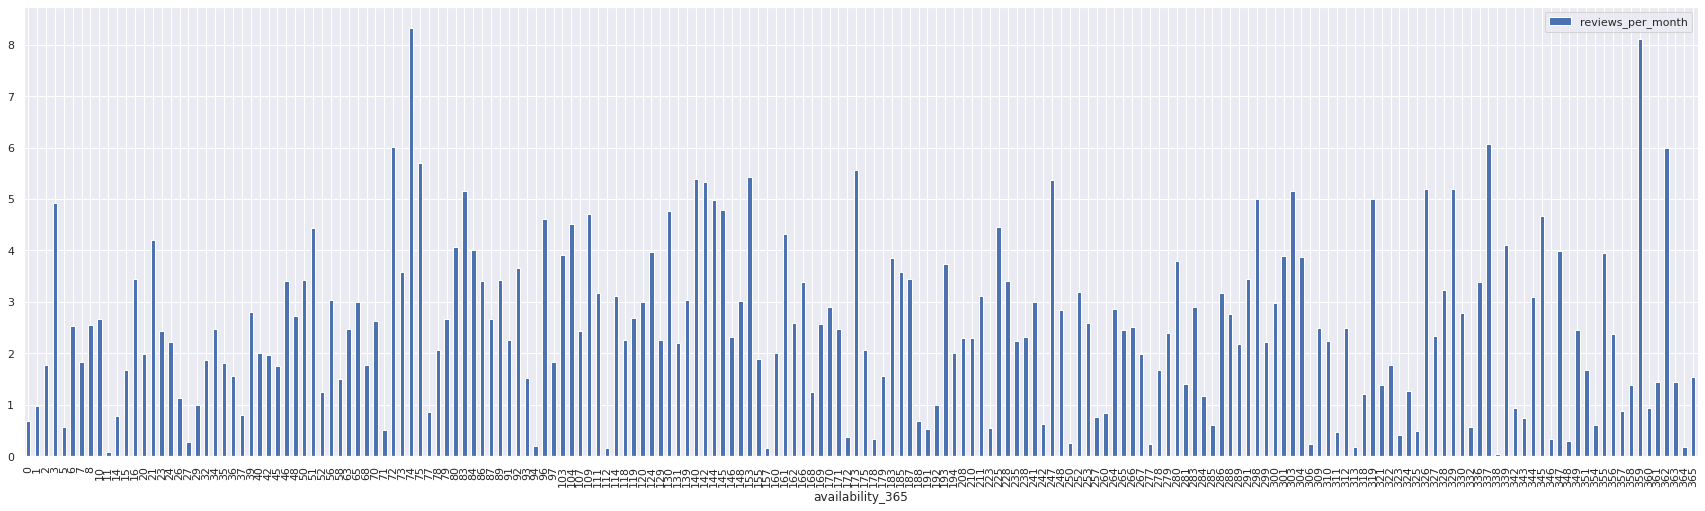

In [67]:
sns.set(rc={'figure.figsize':(30,8.27)}) 
av_365_req3.plot(x='availability_365',y='reviews_per_month',kind='bar',style='o') #for entire hoem/apt at bronx
plt.show()

# 4) does no of review affect the price

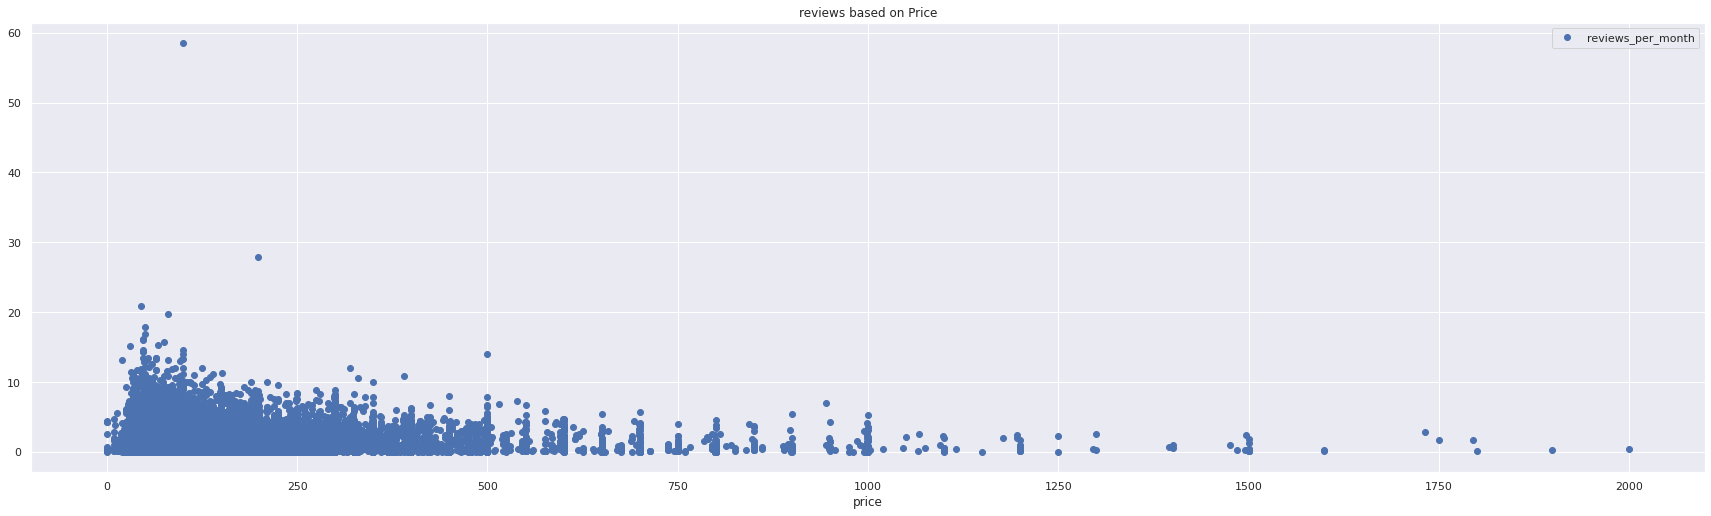

In [69]:
price_review = df[['reviews_per_month', 'price']].sort_values(by = 'price')
price_review=price_review.loc[price_review['reviews_per_month']>0]
price_review=price_review.loc[price_review['price']<2000]
price_review.plot(x = 'price', y = 'reviews_per_month', 
                  style = 'o',
                  title = 'reviews based on Price')

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x7f90867b11d0>>

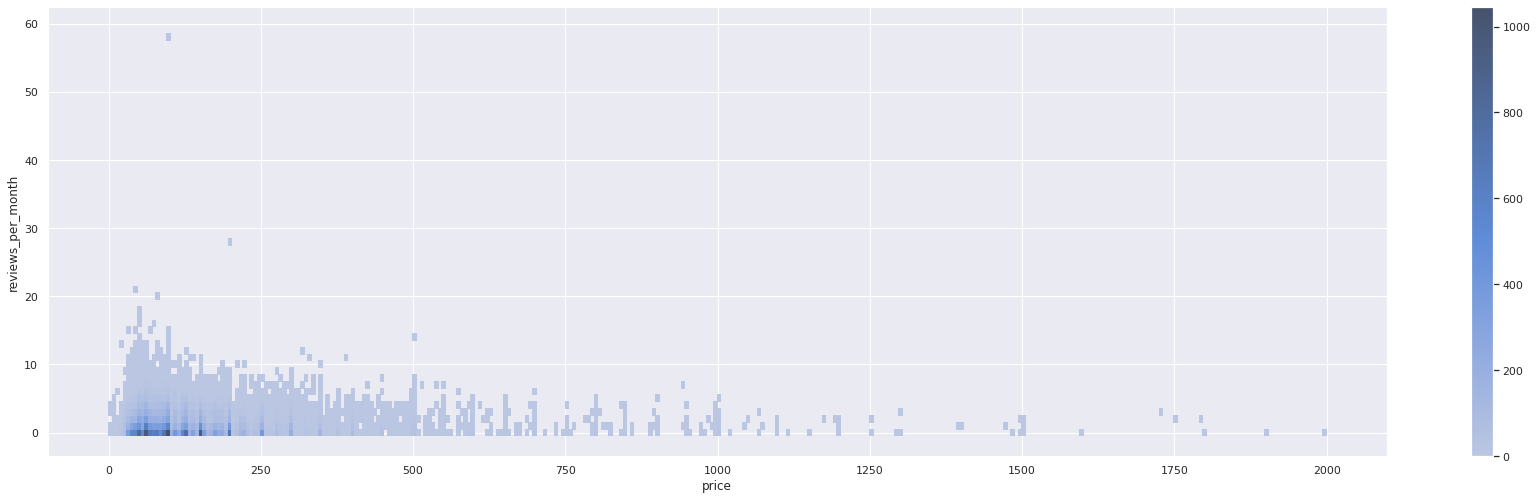

In [70]:
sns.histplot(data = price_review, x = 'price', y = 'reviews_per_month',discrete=(False,True),cbar=True).set

##Observations

1) review per month of price range between 0 & 250 is more by which we can conclude that most people prefer renting rooms which have a price below 250 

2) reviews per month decrease as you increase the price